# Data Challenge 4e: Q-transform - Glitches - Hanford

## Download data

In [1]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf

--2022-05-27 21:51:56--  https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256815066 (245M)
Saving to: ‘challenge3.gwf’

challenge3.gwf      100%[===================>] 244.92M  5.31MB/s    in 37s     

2022-05-27 21:52:35 (6.54 MB/s) - ‘challenge3.gwf’ saved [256815066/256815066]



In [1]:
chs = ["H1:CHALLENGE3", "L1:CHALLENGE3"]
# -- for gwpy 
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge3.gwf', channel=chs[0])
# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge3.gwf', chs[0])

duration = len(gwpy_strain)*gwpy_strain.dt
sampling_rate = 1/gwpy_strain.dt
print("duration = {}".format(duration))
print("sampling rate = {}".format(sampling_rate))

duration = 4096.0 s
sampling rate = 4096.0 1 / s


In [7]:
#print(dir(gwpy_strain))
#print(gwpy_strain.value)
#print(gwpy_strain.times)

## Q-transform

In [7]:
import pylab
%matplotlib inline

#def challenge_q_transform(strain,fmin,fmax,qmin,qmax,tmin,tmax):
    #hq = gwpy_strain.q_transform(frange=(fmin, fmax), qrange=(qmin, qmax))
def challenge_q_transform_long(strain,fmin,fmax,qmin,qmax,t,tmin,tmax):
    segment = (int((t-50)*sampling_rate.value), int((t+30)*sampling_rate.value))
    data = gwpy_strain[segment[0]:segment[1]]
    hq = data.q_transform(frange=(fmin, fmax), qrange=(qmin, qmax))
    plot_hq = hq.plot()
    ax = plot_hq.gca()
    ax.set_xlim(tmin,tmax)
    ax.set_yscale('log')
    ax.colorbar(label="Normalised energy")   
    
def challenge_q_transform_short(strain,fmin,fmax,qmin,qmax,t,tmin,tmax):
    segment = (int((t-10)*sampling_rate.value), int((t+4)*sampling_rate.value))
    data = gwpy_strain[segment[0]:segment[1]]
    hq = data.q_transform(frange=(fmin, fmax), qrange=(qmin, qmax))
    plot_hq = hq.plot()
    ax = plot_hq.gca()
    ax.set_xlim(tmin,tmax)
    ax.set_yscale('log')
    ax.colorbar(label="Normalised energy")   

### 35 M_sun

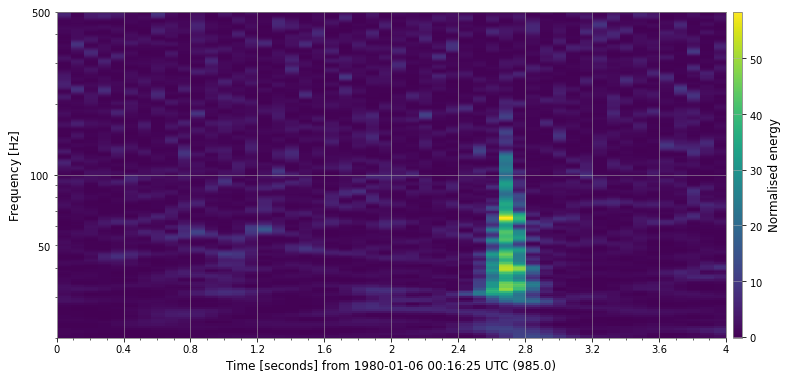

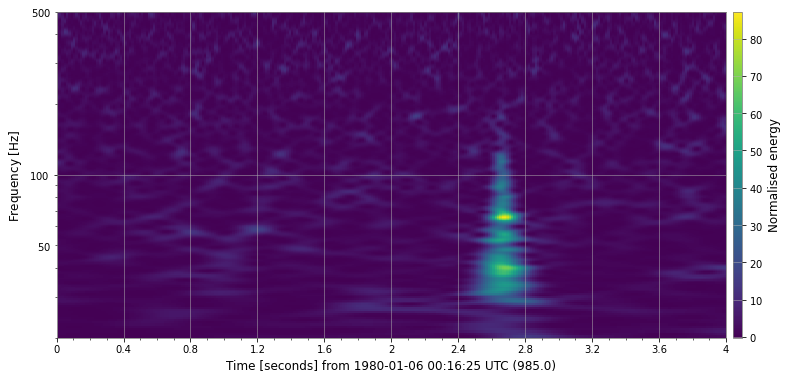

In [8]:
t0 = 987
t = [t0-2,t0+2]
q = [30,200]
f = [20,500]
challenge_q_transform_long(gwpy_strain,f[0],f[1],q[0],q[1],t0,t[0],t[1])
challenge_q_transform_short(gwpy_strain,f[0],f[1],q[0],q[1],t0,t[0],t[1])

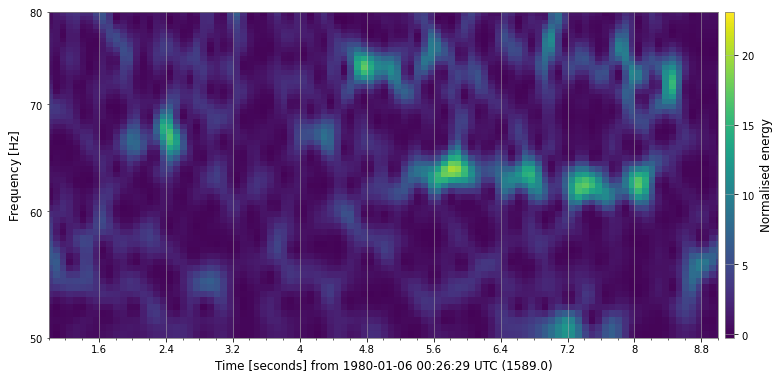

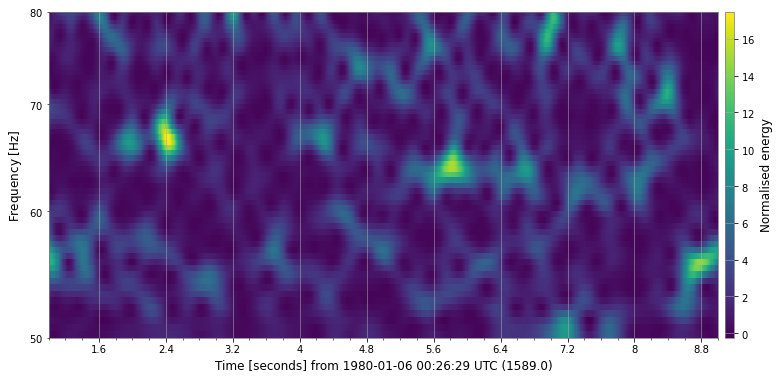

In [10]:
t0 = 1595
t = [t0-5,t0+3]
q = [50,80]
f = [50,80]
challenge_q_transform_long(gwpy_strain,f[0],f[1],q[0],q[1],t0,t[0],t[1])
challenge_q_transform_short(gwpy_strain,f[0],f[1],q[0],q[1],t0,t[0],t[1])